In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing libraries**

First and foremost step of any model building in a programming language is to imoprt required libaries. Libraries can be imported using *import* keyword in python

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import seaborn as sns
import datetime
from math import sqrt
#sns.set()

# Loading dataset from drive into our google colab notebook

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Dataset/TaxiFare.csv')
dataset.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


# **Data Preprocessing**

Data preprocessing is an important step in the data mining process. It refers to the cleaning, transforming, and integrating of data in order to make it ready for analysis. The goal of data preprocessing is to improve the quality of the data and to make it more suitable for the specific data mining task. It includes task like data cleaning, data transformation, etc.


In [ ]:
dataset.shape

(50000, 8)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [ ]:
dataset.isna().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

<Axes: xlabel='no_of_passenger', ylabel='count'>

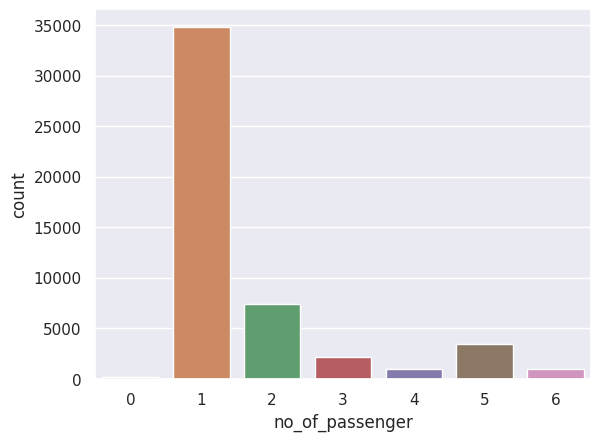

In [ ]:
sns.countplot(x=dataset['no_of_passenger'])

In [ ]:
dataset = dataset[dataset['no_of_passenger'] == 1]
dataset = dataset.drop(['unique_id'], axis=1)
dataset.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1


In [ ]:
dataset.shape

(34808, 7)

In [ ]:
dataset['amount'] = pd.to_numeric(dataset['amount'], errors='coerce')

In [ ]:
correlation_matrix = dataset.corr()
correlation_matrix['amount'].sort_values(ascending=False)

<ipython-input-99-6b642d1656a6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


amount                  1.000000
longitude_of_dropoff    0.005171
longitude_of_pickup     0.004961
latitude_of_dropoff    -0.005030
latitude_of_pickup     -0.005709
no_of_passenger              NaN
Name: amount, dtype: float64

In [ ]:
for i, row in dataset.iterrows():
    date = datetime.datetime.strptime(row['date_time_of_pickup'], '%Y-%m-%d %H:%M:%S UTC')
    dataset.at[i, 'day_of_week'] = date.weekday()
    dataset.at[i, 'pickup_time'] = date.hour
    X = (row['longitude_of_dropoff'] - row['longitude_of_pickup']) * 54.6 # 1 degree == 54.6 miles
    Y = (row['latitude_of_dropoff'] - row['latitude_of_pickup']) * 69.0   # 1 degree == 69 miles
    distance = sqrt(X**2 + Y**2)
    dataset.at[i, 'distance'] = distance

dataset.head()

In [ ]:
dataset.drop(columns=['date_time_of_pickup', 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff'], inplace=True)
dataset.head()

In [ ]:
Q1 = dataset['no_of_passenger'].quantile(0.25)
Q3 = dataset['no_of_passenger'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print('Lower :',lower)
print('Upper :',upper)

Lower : 1.0
Upper : 1.0


In [ ]:
taxi_df['no_of_passenger'].sort_values(ascending=True).head(10)

1        1
33271    1
33270    1
33269    1
33266    1
33263    1
33256    1
33254    1
33272    1
33252    1
Name: no_of_passenger, dtype: int64

In [ ]:
dataset.drop(dataset[dataset['no_of_passenger'] > 4 ].index, inplace = True)
dataset.drop(dataset[dataset['no_of_passenger'] < 0 ].index, inplace = True)
dataset.drop(dataset[dataset['no_of_passenger'] == 0.12 ].index, inplace = True)
dataset.drop(dataset[dataset['no_of_passenger'].isna() ].index, inplace = True)

In [ ]:
cor_matrix = dataset.corr()
cor_matrix["amount"].sort_values(ascending=False)

amount             1.000000
distance           0.848715
day_of_week        0.002447
pickup_time       -0.018968
no_of_passenger         NaN
Name: amount, dtype: float64

In [ ]:
dataset.describe()

,amount,no_of_passenger,day_of_week,pickup_time,distance
count,21318.000000,21318.0,21318.000000,21318.000000,21318.000000
mean,12.644415,1.0,3.001126,13.358805,2.541714
std,7.003876,0.0,1.950723,6.667406,1.658341
min,2.500000,1.0,0.000000,0.000000,1.000067
25%,8.000000,1.0,1.000000,9.000000,1.375860
50%,10.500000,1.0,3.000000,14.000000,1.949615
75%,14.900000,1.0,5.000000,19.000000,3.088507
max,49.830000,1.0,6.000000,23.000000,9.969143


In [ ]:
dataset = dataset[(dataset['distance'] > 1.0) & (dataset['distance'] < 10.0)]
dataset = dataset[(dataset['amount'] > 0.0) & (dataset['amount'] < 50.0)]
dataset.shape

(21318, 5)

In [ ]:
corr_matrix = dataset.corr()
corr_matrix["amount"].sort_values(ascending=False)

amount             1.000000
distance           0.848715
day_of_week        0.002447
pickup_time       -0.018968
no_of_passenger         NaN
Name: amount, dtype: float64

#**Train Test Split**

We divide our complete dataset into two subset i.e. *training dataset* and *testing dataset* for traing of model and model testing respectively. it can be done using train_test_split() function of sklearn library.

In [ ]:
from sklearn.model_selection import train_test_split
x = dataset.drop(['amount'], axis=1)
y = dataset['amount']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# **Model Building and Evaluation**
We build model and train it using training dataset. It's a regression problem, so we would use a regression model or regressor to solve it. Following are some example of regressors:
* Linear Regression
* Polynomial Regression
* Decision Tree Regression
* Random Forest Regression
* Support Vector Regression

Here we are using *Linear Regressionn* and *Support Vector Regression* for given problem. *Cross Validation Score*, *Score* and *Mean Absolute Error* are used for evaluation of each model.

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
pred=lr.predict(x_test)
print(pred)

[11.17207401 11.36162302  9.83825274 ...  8.50613663  8.13904499
 14.50337444]


In [ ]:
lr.score(x_test, y_test)

0.7294968092631228

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

In [ ]:
cross_val_score(lr, x, y, cv=5).mean()

0.7207057353445661

In [ ]:
mean_absolute_error(y_test,pred)

2.428339345293518

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='poly')
# train the model on the data
svr.fit(x_train, y_train)

SVR(kernel='poly')

In [ ]:
y_pred = svr.predict(x_test)
print(y_pred)

[10.36609741  9.81669675  9.62183945 ...  8.40214563  9.36917564
 12.77607843]


In [ ]:
svr.score(x_test, y_test)

0.6080946941490328

In [ ]:
cross_val_score(svr, x, y, cv=5).mean()

0.6058386339988726

In [ ]:
mean_absolute_error(y_test,pred)

2.428339345293518